In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV, train_test_split)
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, 
                             recall_score, accuracy_score, precision_score, confusion_matrix,
                             fbeta_score)
from tools import (Modelisation, datasets, SearchCV, restauration_CV, 
                   graph_2scores_CV, graph_3scores_CV, graph_param_CV, 
                   best_score_CV)

from tqdm.notebook import trange, tqdm

plt.style.use("ggplot")

t = time.time()

## Random forest 

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
display(df.shape)
datasets_df = datasets(df, verbose=False)
X = datasets_df['X']
y = datasets_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)

(1610494, 48)

In [3]:
dico, results = restauration_CV('Forest_CV_Randomized1000_4356_0.05')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 4356
n_iter : 1000
data_frac : 0.05
temps : 06:51:15
n_jobs : 28
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


In [4]:
best_param_forest = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
702,77.505569,0.898281,2.340056,0.029954,400,2,1,sqrt,30,False,...,959,0.123778,0.008302,1,0.076547,0.005497,1,0.072303,0.005226,1
101,19.949111,0.875254,0.658975,0.092017,100,2,1,sqrt,60,False,...,993,0.123298,0.005852,2,0.076512,0.004075,2,0.072292,0.00389,2
516,42.058799,6.027751,1.223548,0.03364,200,2,1,sqrt,60,False,...,962,0.122304,0.007375,3,0.075568,0.004993,3,0.071373,0.004756,3
994,19.700876,0.218639,0.613247,0.011177,100,2,1,sqrt,<NA>,False,...,999,0.12048,0.011919,4,0.07478,0.007974,4,0.070658,0.007585,4
880,236.229033,2.327122,7.003332,0.127823,1200,2,1,sqrt,50,False,...,977,0.1204,0.005867,5,0.074342,0.003891,5,0.070211,0.0037,5
886,117.831136,1.732347,3.584187,0.138496,600,2,1,sqrt,50,False,...,983,0.120272,0.009643,6,0.074331,0.00646,6,0.070206,0.006146,6
733,19.694853,0.122897,0.618738,0.014712,100,2,1,sqrt,70,False,...,1000,0.119663,0.010541,9,0.074285,0.00705,7,0.070191,0.006706,7
831,79.719741,0.534912,2.366392,0.016282,400,2,1,sqrt,40,False,...,972,0.120073,0.008818,7,0.0741,0.005918,8,0.069978,0.00563,8
430,316.67332,4.973586,9.936224,1.218804,1600,2,1,sqrt,60,False,...,974,0.119691,0.005106,8,0.073854,0.003529,9,0.069745,0.003368,9
556,198.807608,2.318134,5.848273,0.054374,1000,2,1,sqrt,90,False,...,990,0.119492,0.008146,10,0.073839,0.005469,10,0.069741,0.005204,10


Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [5]:
%%time
clf = RandomForestClassifier(**best_param_forest, n_jobs=-1)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]

CPU times: user 2h 18min 14s, sys: 32.9 s, total: 2h 18min 47s
Wall time: 2min 52s


In [6]:
# def adjusted_classes(y_scores, t):
#     return [1 if y >= t else 0 for y in y_scores]

In [7]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [8]:
def plot_metrics_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Metrics as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "k-", label="Recall")
    f1 = 2*p*r/(p+r)
    f3 = 10*p*r/(9*p+r)
    f5 = 26*p*r/(25*p+r)
    plt.plot(thresholds, f1[:-1], 'r', label="F1")
    plt.plot(thresholds, f3[:-1], 'm', label="F3")
    plt.plot(thresholds, f5[:-1], 'g', label="F5")
    plt.axvline(x=0.5,color='black', linewidth=1)
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

<ipython-input-8-68a3691b78b3>:6: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2*p*r/(p+r)
<ipython-input-8-68a3691b78b3>:7: RuntimeWarning: invalid value encountered in true_divide
  f3 = 10*p*r/(9*p+r)
<ipython-input-8-68a3691b78b3>:8: RuntimeWarning: invalid value encountered in true_divide
  f5 = 26*p*r/(25*p+r)


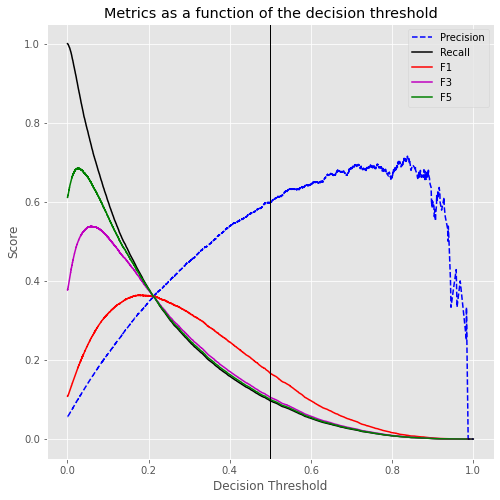

In [9]:
plot_metrics_vs_threshold(p, r, thresholds)

In [10]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.8264872781524515


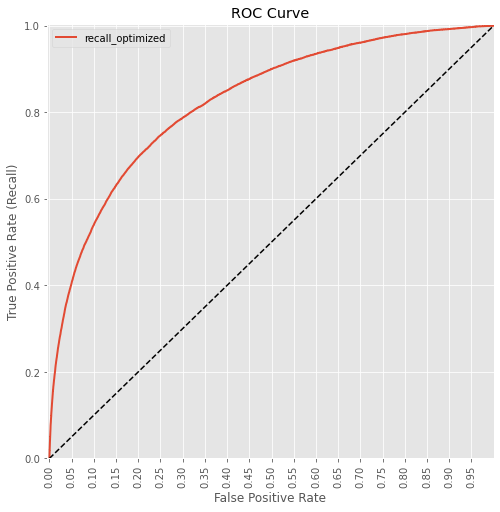

In [11]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

## Logistic regression

In [12]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
display(df.shape)
datasets_df = datasets(df, verbose=False)
X = datasets_df['X']
y = datasets_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)

(1610494, 48)

In [13]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(data=X_train, columns=columns)
X_test = pd.DataFrame(data=X_test, columns=columns)

In [14]:
dico, results = restauration_CV('LR_CV_Grid_300_1')

model : LogisticRegression()
model_name : LR
type : GridSearchCV
len_grid : 300
data_frac : 1
temps : 00:19:54
n_jobs : 28
params : {'C': array([1.00000000e-06, 1.88739182e-06, 3.56224789e-06, 6.72335754e-06,
       1.26896100e-05, 2.39502662e-05, 4.52035366e-05, 8.53167852e-05,
       1.61026203e-04, 3.03919538e-04, 5.73615251e-04, 1.08263673e-03,
       2.04335972e-03, 3.85662042e-03, 7.27895384e-03, 1.37382380e-02,
       2.59294380e-02, 4.89390092e-02, 9.23670857e-02, 1.74332882e-01,
       3.29034456e-01, 6.21016942e-01, 1.17210230e+00, 2.21221629e+00,
       4.17531894e+00, 7.88046282e+00, 1.48735211e+01, 2.80721620e+01,
       5.29831691e+01, 1.00000000e+02]), 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16.5}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


In [15]:
best_param_LR = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,mean_test_recall,std_test_recall,rank_test_recall,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
281,23.603975,0.424289,1.267619,0.122257,52.983169,balanced,"{'C': 52.98316906283702, 'class_weight': 'bala...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
261,25.572857,1.84721,1.327648,0.105604,14.873521,balanced,"{'C': 14.873521072935118, 'class_weight': 'bal...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
291,22.541212,1.373823,1.214874,0.140763,100.0,balanced,"{'C': 100.0, 'class_weight': 'balanced'}",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
231,22.69218,0.862041,1.292479,0.073772,2.212216,balanced,"{'C': 2.21221629107045, 'class_weight': 'balan...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
271,22.578504,0.849444,1.246491,0.146737,28.072162,balanced,"{'C': 28.072162039411758, 'class_weight': 'bal...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
241,23.757304,0.368637,1.325371,0.167128,4.175319,balanced,"{'C': 4.175318936560401, 'class_weight': 'bala...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
251,22.378671,2.153017,1.330958,0.021784,7.880463,balanced,"{'C': 7.880462815669905, 'class_weight': 'bala...",0.618597,0.004566,31,...,258,0.251002,0.001405,191,0.478455,0.003152,1,0.555964,0.003899,31
171,24.330094,0.382302,1.340492,0.175269,0.048939,balanced,"{'C': 0.04893900918477489, 'class_weight': 'ba...",0.618586,0.004574,38,...,257,0.251001,0.001404,198,0.478449,0.003154,8,0.555956,0.003904,38
201,22.637013,0.733843,1.209076,0.086798,0.329034,balanced,"{'C': 0.3290344562312671, 'class_weight': 'bal...",0.618586,0.004574,38,...,265,0.251,0.001405,199,0.478448,0.003155,9,0.555955,0.003905,39
191,23.687094,0.879318,1.253099,0.13124,0.174333,balanced,"{'C': 0.17433288221999874, 'class_weight': 'ba...",0.618586,0.004574,38,...,267,0.250999,0.001406,200,0.478448,0.003157,10,0.555955,0.003905,40


Meilleure combinaison de paramètres pour f3 :


{'C': 52.98316906283702, 'class_weight': 'balanced'}

In [16]:
%%time
clf = LogisticRegression(**best_param_LR)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]

CPU times: user 1min 37s, sys: 2min 51s, total: 4min 28s
Wall time: 6.9 s


In [17]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

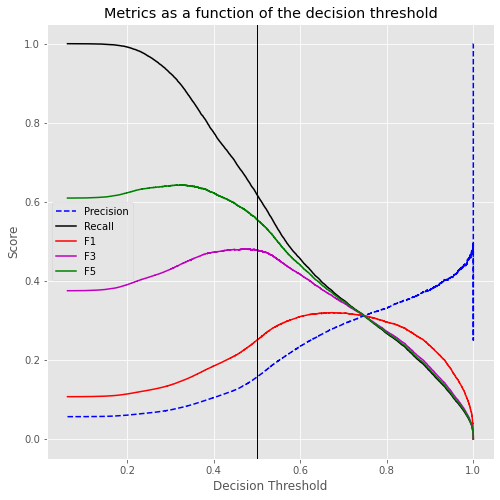

In [18]:
plot_metrics_vs_threshold(p, r, thresholds)

In [19]:
results_sort = results.sort_values(by=f'mean_test_f3', ascending=False)

  0%|          | 0/10 [00:00<?, ?it/s]

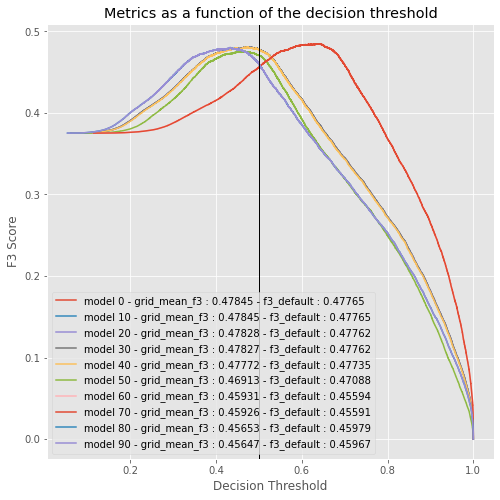

In [20]:
plt.figure(figsize=(8, 8))
plt.title("Metrics as a function of the decision threshold")

for i in trange(0, 100, 10):
    params = results_sort.iloc[i].params
    clf = LogisticRegression(**params)
    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    p, r, thresholds = precision_recall_curve(y_test, y_scores)
    f3 = 10*p*r/(9*p+r)
    
    y_pred = clf.predict(X_test)
    f3_default = fbeta_score(y_test, y_pred, beta=3)
    
    plt.plot(thresholds, f3[:-1], label=f"model {i} - grid_mean_f3 : {results_sort.iloc[i].mean_test_f3:.5f} - f3_default : {f3_default:.5f}")
    
plt.axvline(x=0.5,color='black', linewidth=1)
plt.ylabel("F3 Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

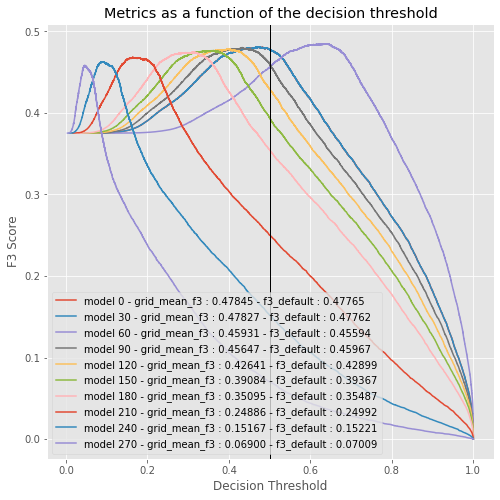

In [23]:
plt.figure(figsize=(8, 8))
plt.title("Metrics as a function of the decision threshold")

for i in trange(0, 300, 30):
    params = results_sort.iloc[i].params
    clf = LogisticRegression(**params)
    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    p, r, thresholds = precision_recall_curve(y_test, y_scores)
    f3 = 10*p*r/(9*p+r)
    
    y_pred = clf.predict(X_test)
    f3_default = fbeta_score(y_test, y_pred, beta=3)
    
    plt.plot(thresholds, f3[:-1], label=f"model {i} - grid_mean_f3 : {results_sort.iloc[i].mean_test_f3:.5f} - f3_default : {f3_default:.5f}")
    
plt.axvline(x=0.5,color='black', linewidth=1)
plt.ylabel("F3 Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

In [22]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:06:44
